In [1]:
import math
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [2]:
from src.load_images import set_database, load_image
from src.show_images import show_img, show_imgs
from src.image_math import image_histogram, image_histogram_channels, convulsion
from src.image_transformations import shrink_image, normalize_image, unormalize_image, blur_image

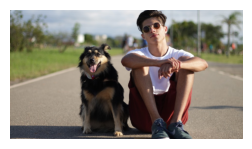

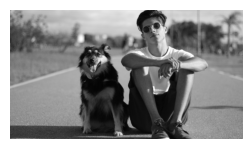

In [12]:
set_database("custom")

img, gray_img = load_image("image.jpg")
img = shrink_image(img, 300)
gray_img = shrink_image(gray_img, 300)

show_img(img)
show_img(gray_img)

# Convolutions

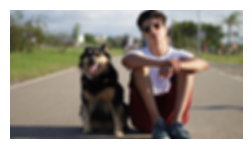

In [13]:
show_img(blur_image(img, 10).astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


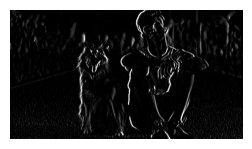

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


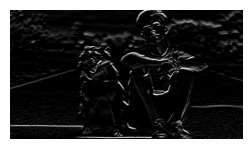

In [14]:
conv = np.array([
    [-1.0, 0, 1.0],
    [-1.0, 0, 1.0],
    [-1.0, 0, 1.0]
])

img_diff_x = convulsion(normalize_image(gray_img), conv)
show_img(img_diff_x)

conv = np.array([
    [-1.0, -1.0, -1.0],
    [0, 0, 0],
    [1.0, 1.0, 1.0]
])

img_diff_y = convulsion(normalize_image(gray_img), conv)

show_img(img_diff_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


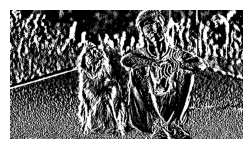

In [15]:
conv = np.array([
    [0, 0, 0],
    [-100, 0, 100],
    [0, 0, 0]
], dtype=float)

t = convulsion(normalize_image(gray_img), conv)

show_img(t)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


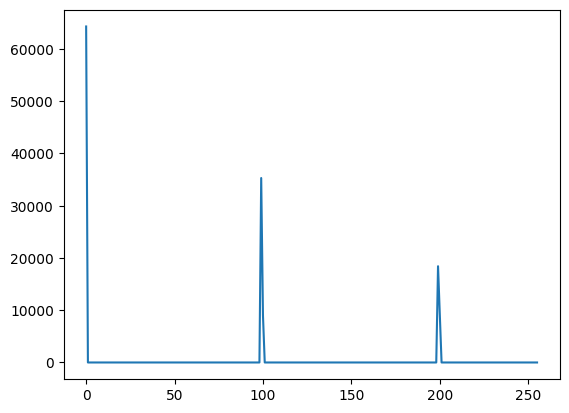

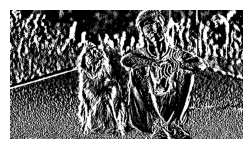

In [16]:
edgesImg = convulsion(normalize_image(gray_img), conv)
hist, colors = image_histogram(unormalize_image(edgesImg))
plt.plot(colors, hist)

show_img(edgesImg)

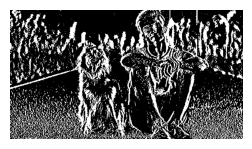

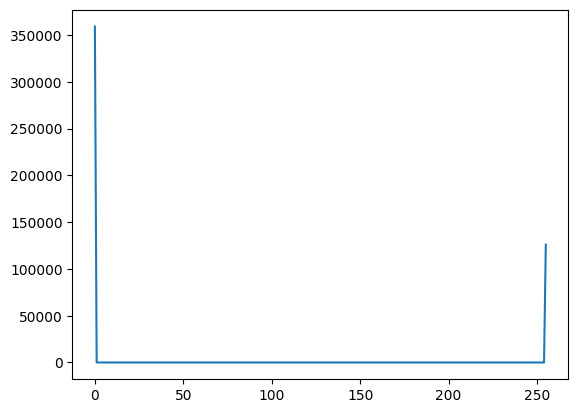

In [17]:
t = edgesImg.copy()

t[t > 0.8] = 1.0
t[t < 0.8] = 0.0
show_img(t)

hist, colors = image_histogram(unormalize_image(t))
plt.plot(colors, hist)

In [ ]:
mat = t[:,:,0].copy().astype(int)

mat = mat * 2 - 1

tSums = np.empty((mat.shape))
for j in range(mat.shape[0]):
    for i in range(mat.shape[1]):
        tSums[j,i] = mat[0:j+1,0:i+1].sum()
        
jMin = jMax = iMin = iMax = 0
maxSum = 0

for j1 in range(0, mat.shape[0]):
    for i1 in range(0, mat.shape[1]):
        for j2 in range(j1, mat.shape[0]):
            for i2 in range(i1, mat.shape[1]):
                m = tSums[j2, i2]
                if j1 > 0:
                    m -= tSums[j1, i2]
                if i1 > 0:
                    m -= tSums[j2, i1]
                if j1 > 0 and i1 > 0:
                    m += tSums[j1, i1]
                
                if (m > maxSum):
                    maxSum = m
                    jMin, jMax, iMin, iMax = j1, j2, i1, i2

jMin, jMax, iMin, iMax

In [ ]:
show_imgs([img[jMin:jMax, iMin:iMax,:]])